<a href="https://colab.research.google.com/github/Azissu/DataMining-HibatulAzis/blob/main/TAdatamining-metoderandomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #untuk operasi matematika
import pandas as pd #untuk membaca file
import warnings #hiraukan warning
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer #mentransform kolom
from sklearn.preprocessing import OneHotEncoder #mengubah kolom ke nilai boolean
from sklearn.metrics import mean_squared_error, mean_absolute_error #melihat nilai MSE dan MAE
from sklearn.model_selection import train_test_split #memisahkan data training dan testing
from sklearn.ensemble import RandomForestRegressor #memanggil model random forest
from sklearn.model_selection import GridSearchCV #hyper parameter data

data loading

In [ ]:
df = pd.read_csv("/content/bundesliga_player.csv",index_col = [0]) #membaca file di laptop

In [ ]:
df.head() #menampilkan 5 data teratas


,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


informasi data

In [ ]:
df.shape #melihat jumlah baris dan kolom

(515, 16)

In [ ]:
df.describe() #untuk melihat nilai deskriptif
#count jumlah data(baris)
#mean rata rata
#std standard deviasi
#min nilai terkecil
#25% nilai kuartil satu
#50% nilai kuartil dua atau q2 atau median
#75% nilai kuartil tiga
#max nilai maksimal

,age,height,price,max_price,shirt_nr
count,515.000000,515.000000,510.000000,510.000000,515.000000
mean,25.683495,1.847612,8.482794,13.513627,19.798058
std,4.700238,0.060996,14.653440,18.659222,12.414768
min,17.000000,1.680000,0.025000,0.100000,1.000000
25%,22.000000,1.800000,1.200000,2.500000,9.000000
50%,25.000000,1.850000,3.500000,7.000000,20.000000
75%,29.000000,1.890000,9.000000,16.750000,29.000000
max,39.000000,2.000000,120.000000,150.000000,49.000000


In [ ]:
df.info() #melihat tipe data
#object= data string
#int bilangan bulat numerik
#float desimal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              515 non-null    object 
 1   full_name         229 non-null    object 
 2   age               515 non-null    int64  
 3   height            515 non-null    float64
 4   nationality       515 non-null    object 
 5   place_of_birth    510 non-null    object 
 6   price             510 non-null    float64
 7   max_price         510 non-null    float64
 8   position          515 non-null    object 
 9   shirt_nr          515 non-null    int64  
 10  foot              506 non-null    object 
 11  club              515 non-null    object 
 12  contract_expires  481 non-null    object 
 13  joined_club       515 non-null    object 
 14  player_agent      488 non-null    object 
 15  outfitter         193 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory u

checking missing value (informasi hilang)

In [ ]:
df.isna().sum() #mentotal missing value

name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

data cleansing

In [ ]:

#memilih fitur yang digunakan
df = df[['age', 'height', 'nationality', 'foot', 'position', 'club',
                        'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'price']]

#mereplace none dalam string menjadi nilai missing value
df['outfitter'] = df['outfitter'].replace(np.nan, 'none')
#replace none menjadi missing value player agent
df['player_agent'] = df['player_agent'].replace(np.nan, 'none')

#untuk menghapus missing value secara permanent menggunakan dropna dan inplace = true
df.dropna(inplace = True)

#memperlihatkan baris dan kolom
print(f'df shape: {df.shape}')

df shape: (468, 11)


mengecek missing value setelah data dibersihkan

In [ ]:
df.isna().sum()

age                 0
height              0
nationality         0
foot                0
position            0
club                0
contract_expires    0
joined_club         0
player_agent        0
outfitter           0
price               0
dtype: int64

menentukan nilai x dan y
x= variabel bebas
y= target

In [ ]:
#prediktor
x = df[['age', 'height', 'foot', 'position', 'club',
                        'contract_expires', 'joined_club', 'player_agent', 'outfitter']]
y = df["price"] #target

one hot encoding (memperbaiki data, datanya menjadi boolean)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")
#unique value nilai yang muncul sekali

Unique values in column 'age': [37 34 23 24 27 22 33 28 25 31 20 17 26 18 21 32 19 29 30 35 39 38 36]
Unique values in column 'height': [1.93 1.83 1.92 1.89 1.86 1.84 1.85 1.8  1.82 1.87 1.77 1.9  1.76 1.81
 1.74 1.91 1.94 1.95 1.7  1.73 1.78 1.79 1.88 1.75 1.71 1.72 1.97 2.
 1.96 1.68 1.98]
Unique values in column 'nationality': ['Germany' 'Switzerland' 'Netherlands' 'France\xa0\xa0Guinea-Bissau'
 'France\xa0\xa0Spain' 'Canada\xa0\xa0Liberia' 'Portugal' 'France'
 'Morocco\xa0\xa0Netherlands' 'Croatia\xa0\xa0Germany'
 'Senegal\xa0\xa0France' 'Netherlands\xa0\xa0Suriname'
 'Germany\xa0\xa0England' 'Germany\xa0\xa0Austria' 'Germany\xa0\xa0Kosovo'
 'France\xa0\xa0Guadeloupe' 'Senegal' 'Germany\xa0\xa0France'
 "Germany\xa0\xa0Cote d'Ivoire" 'Cameroon\xa0\xa0Germany'
 'Germany\xa0\xa0Poland' 'France\xa0\xa0Mali' 'Germany\xa0\xa0Greece'
 'Portugal\xa0\xa0France' 'Norway' 'Belgium' 'Spain'
 'Turkey\xa0\xa0Germany' 'Germany\xa0\xa0Turkey' 'France\xa0\xa0Guinea'
 'England' 'Germany\xa0\xa0Syria

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468 entries, 0 to 514
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               468 non-null    int64  
 1   height            468 non-null    float64
 2   nationality       468 non-null    object 
 3   foot              468 non-null    object 
 4   position          468 non-null    object 
 5   club              468 non-null    object 
 6   contract_expires  468 non-null    object 
 7   joined_club       468 non-null    object 
 8   player_agent      468 non-null    object 
 9   outfitter         468 non-null    object 
 10  price             468 non-null    float64
dtypes: float64(2), int64(1), object(8)
memory usage: 43.9+ KB


In [ ]:
columns_to_encode = ['foot', 'position', 'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter']

# Membuat objek ColumnTransformer dengan transformer 'encoder' yang menggunakan OneHotEncoder
# untuk mengkodekan kolom-kolom dalam columns_to_encode.
# Parameter 'remainder' diatur sebagai 'passthrough' untuk menyertakan kolom yang tidak perlu diubah.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

# Melakukan transformasi menggunakan ColumnTransformer pada DataFrame x
df_features_encoded = ct.fit_transform(x)

# Menampilkan bentuk DataFrame hasil encoding
print(df_features_encoded.shape)

(468, 415)


latihan dan uji data

In [ ]:
#untuk membagi data latih dan uji sebanyak 30%
x_train, x_test, y_train, y_test = train_test_split(df_features_encoded, y, test_size = 0.3, random_state=0)

#untuk meratakan array y train y test menjadi 1 dimensi
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

#menampilkan bentuk data
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (327, 415)
x_test: (141, 415)
y_train: (327,)
y_test: (141,)


hyper parameter toning (proses mencari hyper parameter yang optimal untuk model machine learning)

In [ ]:
best_rfr = RandomForestRegressor(max_depth=19, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=10)

best_rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=19, min_samples_leaf=3, min_samples_split=10,
                      n_estimators=10)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_train(X, y, model):
    model.fit(X, y)
    prediction = model.predict(X)

    mse = mean_squared_error(y, prediction)
    rmse = mean_squared_error(y, prediction, squared=False)
    mae = mean_absolute_error(y, prediction)
    r2 = r2_score(y, prediction)

    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R2 Score: {r2}')

In [ ]:
eval_train(df_features_encoded,y,best_rfr)

Mean Squared Error: 77.54799867713523
Root Mean Squared Error: 8.806134150530255
Mean Absolute Error: 4.459505427375982
R2 Score: 0.6623432526614955


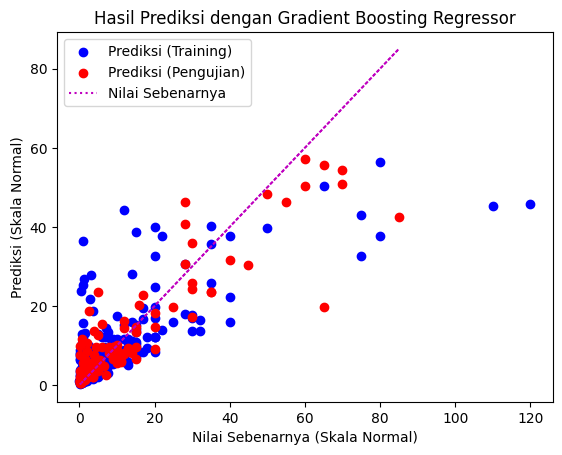

In [ ]:
import matplotlib.pyplot as plt

# Lakukan prediksi pada data latih dan pengujian
y_train_pred = best_rfr.predict(x_train)
y_test_pred = best_rfr.predict(x_test)

# Buat visualisasi hasil prediksi
plt.scatter(y_train, y_train_pred, color='b', label='Prediksi (Training)')
plt.scatter(y_test, y_test_pred, color='r', label='Prediksi (Pengujian)')
plt.plot(y_test, y_test, color='m', linestyle='dotted', label='Nilai Sebenarnya')

plt.title('Hasil Prediksi dengan Fandom Forest')
plt.xlabel('Nilai Sebenarnya (Skala Normal)')
plt.ylabel('Prediksi (Skala Normal)')
plt.legend()
plt.show()

model yg dibuat bisa memprediksi sampai 60%, tetapi jika memprediksi nilai tinggi tidak akurat